1. PCA Description
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset by transforming the original variables into a set of new variables, called principal components. These principal components are uncorrelated and are ordered in such a way that the first few components retain most of the variance present in the original dataset. This method helps simplify the complexity of data, facilitates visualization, and often speeds up machine learning algorithms without losing significant information.

2. Dataset Selection
For this analysis, the dataset final_cleaned.csv is used. This dataset contains pollutant values such as pm25, pm10, no2, so2, o3, co as well as geographical information like latitude and longitude. The pollutants and location data will be analyzed using PCA to reduce the complexity of the data while retaining the essential variance.

3. Data Preparation
The dataset is formatted by pivoting the pollutants into separate columns and including geographical data such as latitude and longitude. This ensures that the dataset is quantitative, with all labels removed, making it suitable for PCA.

In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('final_cleaned.csv')

# Pivot the data to have pollutants as separate columns
df_pivot = df.pivot_table(values='value', index=['location', 'city', 'country', 'timestamp', 'latitude', 'longitude'], columns='pollutant').reset_index()

# Include pollutants and location, and drop rows with missing values
df_with_location = df_pivot[['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']].dropna()

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_with_location)

# Display the normalized data
df_normalized = pd.DataFrame(df_normalized, columns=df_with_location.columns)
print(df_normalized.head())

pollutant  latitude  longitude      pm25      pm10       no2       so2  \
0         -0.145309   1.151505 -0.106418 -0.628025  1.103865  0.192134   
1         -0.145309   1.151505 -0.693376 -1.034705  0.008342 -0.321903   
2         -0.145309   1.151505 -0.624319 -0.841393 -0.547334 -0.320039   
3         -0.145309   1.151505 -0.579929 -1.004653 -0.491284 -0.140116   
4         -0.145309   1.151505 -0.598696 -0.998882 -0.412054 -0.350803   

pollutant        o3        co  
0          0.441910  0.226655  
1          0.867939  0.129918  
2          1.341383  0.002501  
3          1.159562  0.051243  
4          1.112768  0.084405  


4. PCA with Two and Three Components
Performing PCA twice using n_components=2 and n_components=3 to reduce the data to two and three dimensions.

In [98]:
# Save the prepared dataset to a CSV file (optional)
df_normalized.to_csv('prepared_pollutant_data_for_PCA.csv', index=False)

In [106]:
# Perform PCA with 2 components
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(df_normalized)

# Perform PCA with 3 components
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(df_normalized)

# Convert PCA results to DataFrame
pca_df_2 = pd.DataFrame(pca_result_2, columns=['PC1', 'PC2'])
pca_df_3 = pd.DataFrame(pca_result_3, columns=['PC1', 'PC2', 'PC3'])

5. Visualization of PCA Results

PCA with 2 Components (2D)

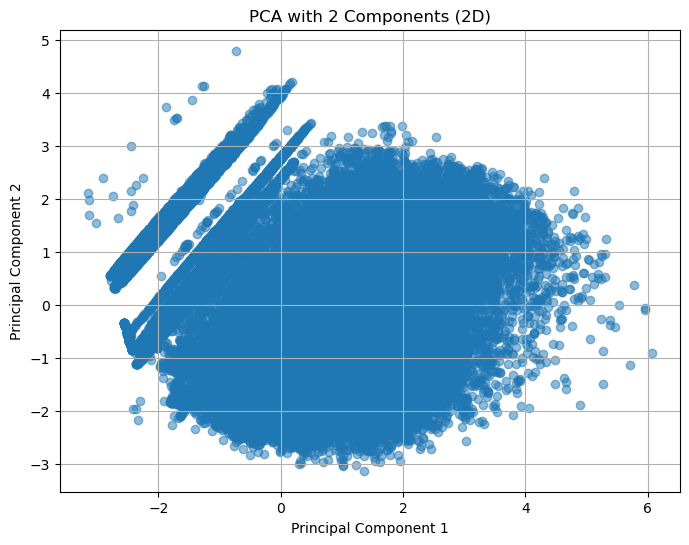

In [112]:
# Plot PCA with 2 components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_2['PC1'], pca_df_2['PC2'], alpha=0.5)
plt.title('PCA with 2 Components (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

PCA with 3 Components (3D)

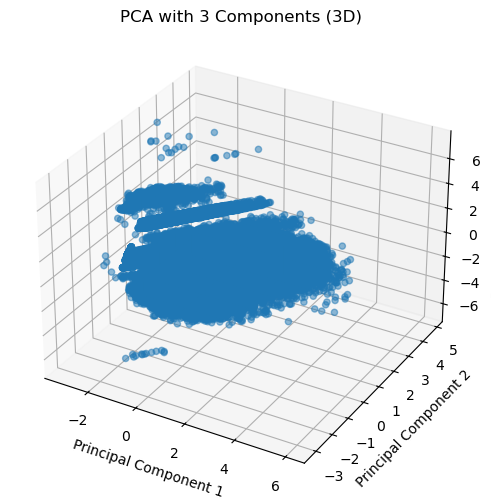

In [72]:
from mpl_toolkits.mplot3d import Axes3D

# Plot PCA with 3 components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3['PC1'], pca_df_3['PC2'], pca_df_3['PC3'], alpha=0.5)
ax.set_title('PCA with 3 Components (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

6. Variance Explained

How much information remains in the 2D dataset?

In [74]:
explained_variance_2 = pca_2.explained_variance_ratio_.cumsum()
print(f"Variance explained by the first 2 components: {explained_variance_2[-1]:.2f}")

Variance explained by the first 2 components: 0.54


How much information remains in the 3D dataset?

In [76]:
explained_variance_3 = pca_3.explained_variance_ratio_.cumsum()
print(f"Variance explained by the first 3 components: {explained_variance_3[-1]:.2f}")

Variance explained by the first 3 components: 0.69


How many dimensions are required to retain at least 95% of the variance?

In [78]:
# Determine the number of components needed to retain 95% of variance
pca_full = PCA().fit(df_normalized)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components needed to retain at least 95% variance: {n_components}")

Number of components needed to retain at least 95% variance: 7


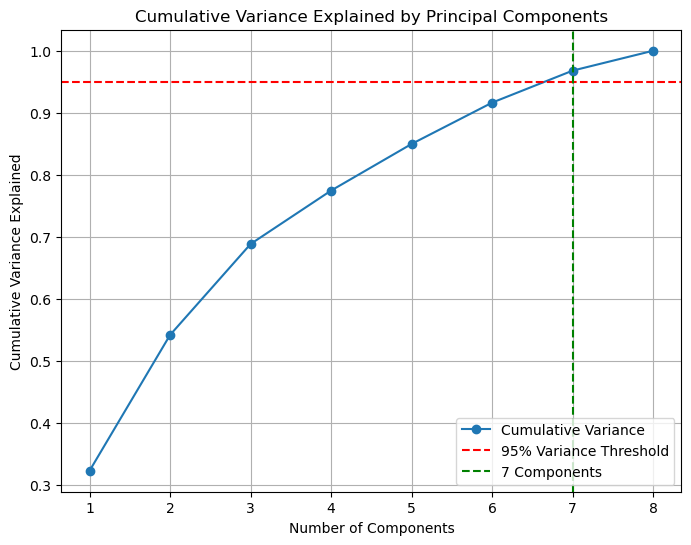

In [115]:
# Create a plot for cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')

# Mark the 95% threshold with a horizontal line and vertical line
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'{n_components} Components')

# Labels and title
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend(loc='lower right')

# Show plot
plt.grid(True)
plt.show()

7. Top Three Eigenvalues
 
To obtain the top three eigenvalues of the dataset:

In [80]:
# Eigenvalues are proportional to explained variance
eigenvalues = pca_full.explained_variance_[:3]
print(f"Top three eigenvalues: {eigenvalues}")

Top three eigenvalues: [2.58369931 1.75141754 1.17266964]


Conclusions:

This analysis demonstrates the utility of PCA in dimensionality reduction. By reducing the data to two or three dimensions, a substantial portion of the variance is retained, which simplifies visualization and computation. However, to maintain nearly all the dataset's variance, 7 principal components are required. This finding helps in optimizing the balance between dataset complexity and the amount of retained information.